<a href="https://colab.research.google.com/github/JNComputingLIFE/Hackathon24-DenodoSentiment/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.util import ngrams

df = pd.read_csv("bank_reviews3.csv")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

    author          date    address       bank  rating  \
17     NaN  Mar 19, 2020  Hyderabad        SBI     4.0   
36     NaN  Mar 17, 2020  Bangalore     review     4.5   
390    NaN  Feb 03, 2020    Chennai  Axis Bank     3.0   
992    NaN  Nov 26, 2019  Bangalore     review     3.0   

                 review_title_by_user  \
17         "Need to improve service "   
36                            "Good "   
390  "Need to improve  their service"   
992                            "Good"   

                                                review  \
17   I am using saving account from SBI almost 7-8 ...   
36   I am holding a salary account from BANK OF BAR...   
390  I have been  using AXIS bank saving account fo...   
992  For the past 6 months I am holding a salary ac...   

                                            bank_image rating_title_by_user  \
17   https://static.bankbazaar.com/images/common/ba...               Great!   
36   https://static.bankbazaar.com/images/common/ba...

# Cleaning the dataset

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
null_or_empty_review_title = df[df['review_title_by_user'].isnull() | (df['review_title_by_user'] == '')]

# Display the rows with null values or empty strings in the review_title_by_user column
print(null_or_empty_review_title)


Empty DataFrame
Columns: [author, date, address, bank, rating, review_title_by_user, review, bank_image, rating_title_by_user, useful_count]
Index: []


In [ ]:
df = df.drop(columns=['author','bank_image'])

print(df.head())

           date    address       bank  rating review_title_by_user  \
0  Mar 21, 2020  New delhi        SBI     4.0        "Best saving"   
1  Mar 20, 2020    Kolkata        SBI     5.0       "Good service"   
2  Mar 20, 2020    Hooghly  Axis Bank     5.0  "Excellent Service"   
3  Mar 20, 2020       Pune  HDFC Bank     5.0  "Excellent service"   
4  Mar 20, 2020  Bangalore     review     5.0       "Good account"   

                                              review rating_title_by_user  \
0  State Bank Of India is located nearby in our a...               Great!   
1  I have my salary account in SBI, when I applie...          Blown Away!   
2  I am using Axis bank saving account for the  p...          Blown Away!   
3  I have my salary bank account in HDFC bank for...          Blown Away!   
4  Close to around 10 years, I am holding this Co...          Blown Away!   

   useful_count  
0           133  
1            89  
2            48  
3            52  
4            22  


In [ ]:
bank_counts = df['bank'].value_counts()
print(bank_counts)

bank
review                  285
SBI                     219
HDFC Bank               188
Axis Bank               131
Kotak                    80
Canara Bank              35
IndusInd Bank            20
IDBI                     14
Citibank                 14
Punjab National Bank     14
Name: count, dtype: int64


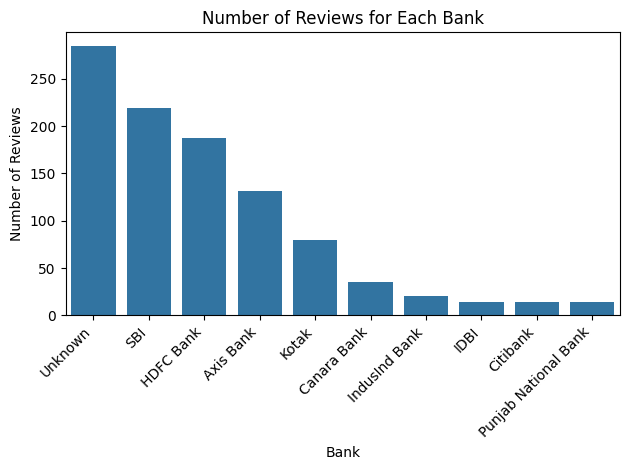

In [ ]:

# Rename the bank named "review" to "unknown"
df['bank'] = df['bank'].replace('review', 'Unknown')

# Count the number of rows for each bank
bank_counts = df['bank'].value_counts().reset_index()
bank_counts.columns = ['Bank', 'Count']

# Create a bar plot
sns.barplot(x='Bank', y='Count', data=bank_counts)
plt.title('Number of Reviews for Each Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Reviews')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust the layout to make room for the labels
plt.tight_layout()

plt.show()


In [ ]:
df.to_csv('clean_bank_reviews.csv', index=False)

# Calculate sentiment based on title


In [ ]:
# Assuming your DataFrame is named df

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

dfst = df

# Apply sentiment analysis to the review_title_by_user column
dfst['sentiment'] = df['review_title_by_user'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Add sentiment_simplified column
dfst['sentiment_simplified'] = df['sentiment'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))

# Display the DataFrame with sentiment scores and sentiment_simplified
print(df)


             date    address       bank  rating  \
0    Mar 21, 2020  New delhi        SBI     4.0   
1    Mar 20, 2020    Kolkata        SBI     5.0   
2    Mar 20, 2020    Hooghly  Axis Bank     5.0   
3    Mar 20, 2020       Pune  HDFC Bank     5.0   
4    Mar 20, 2020  Bangalore    Unknown     5.0   
..            ...        ...        ...     ...   
995  Nov 26, 2019  Ernakulam    Unknown     3.5   
996  Nov 26, 2019  Ernakulam  Axis Bank     4.0   
997  Nov 26, 2019  Bangalore  Axis Bank     4.0   
998  Nov 26, 2019  Hyderabad  Axis Bank     5.0   
999  Nov 26, 2019    Kolkata    Unknown     4.0   

               review_title_by_user  \
0                     "Best saving"   
1                    "Good service"   
2               "Excellent Service"   
3               "Excellent service"   
4                    "Good account"   
..                              ...   
995           "Good network of ATM"   
996            "Mobile app is good"   
997      "Unhappy with the charges" 

In [ ]:
dfst.to_csv('bank_reviews_title_sentiment.csv', index=False)

# Calculate sentiment based on review

In [ ]:
dfsr = df.copy()  # Make a copy of the dataframe to avoid modifying the original

# Apply sentiment analysis to the review column
dfsr['sentiment'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Apply the 1-10 sentiment scale
def map_to_scale(score):
    if score >= 0.75:
        return 10
    elif score >= 0.5:
        return 9
    elif score >= 0.25:
        return 8
    elif score >= 0:
        return 7
    elif score >= -0.25:
        return 6
    elif score >= -0.5:
        return 5
    elif score >= -0.75:
        return 4
    else:
        return 3

dfsr['sentiment_simplified'] = dfsr['sentiment'].apply(map_to_scale)

# Display the DataFrame with sentiment scores and sentiment_simplified
print(dfsr[['review', 'sentiment', 'sentiment_simplified']])


                                                review  sentiment  \
0    State Bank Of India is located nearby in our a...     0.7264   
1    I have my salary account in SBI, when I applie...     0.7165   
2    I am using Axis bank saving account for the  p...     0.4588   
3    I have my salary bank account in HDFC bank for...     0.5267   
4    Close to around 10 years, I am holding this Co...     0.7357   
..                                                 ...        ...   
995  I am holding a saving account with FEDERAL ban...    -0.2732   
996  There is no mandatory balance to keep in my Ax...     0.5499   
997  In Axis bank, every month they are charging me...    -0.2960   
998  I have a salary account with AXIS bank and I h...    -0.6442   
999  Opened the savings account with Union bank of ...    -0.2732   

     sentiment_simplified  
0                       9  
1                       9  
2                       8  
3                       9  
4                       9  
.. 

In [ ]:
dfsr.to_csv('bank_reviews_review_sentiment.csv', index=False)

# Visuals for all banks

<ipython-input-18-b9b932e8d463>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_bank.index, y=sentiment_by_bank.values, palette="coolwarm")


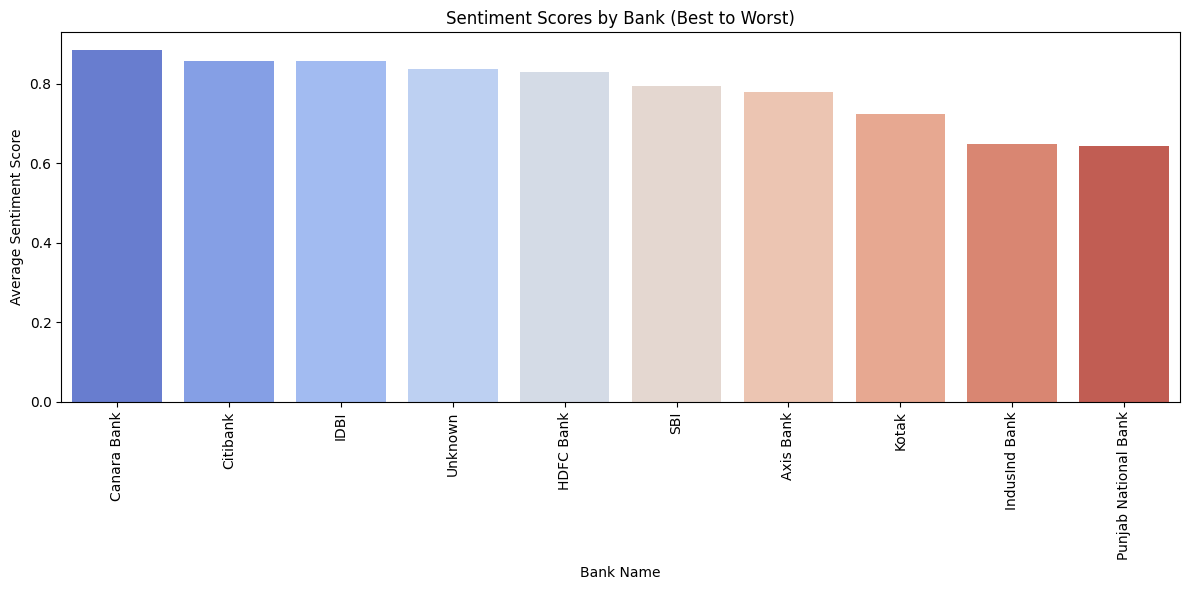

In [ ]:
  # Calculate the average sentiment score for each bank
  sentiment_by_bank = dfst.groupby('bank')['sentiment_simplified'].mean()

  # Sort the sentiment scores from best to worst
  sentiment_by_bank = sentiment_by_bank.sort_values(ascending=False)

  # Plot
  plt.figure(figsize=(12, 6))
  sns.barplot(x=sentiment_by_bank.index, y=sentiment_by_bank.values, palette="coolwarm")
  plt.title('Sentiment Scores by Bank (Best to Worst)')
  plt.xlabel('Bank Name')
  plt.ylabel('Average Sentiment Score')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

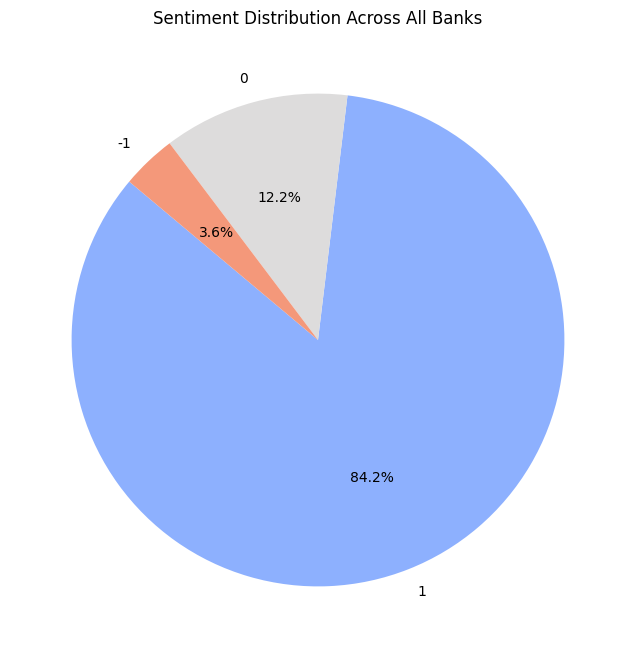

In [ ]:
sentiment_counts = dfst['sentiment_simplified'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(sentiment_counts)))
plt.title('Sentiment Distribution Across All Banks')
plt.show()


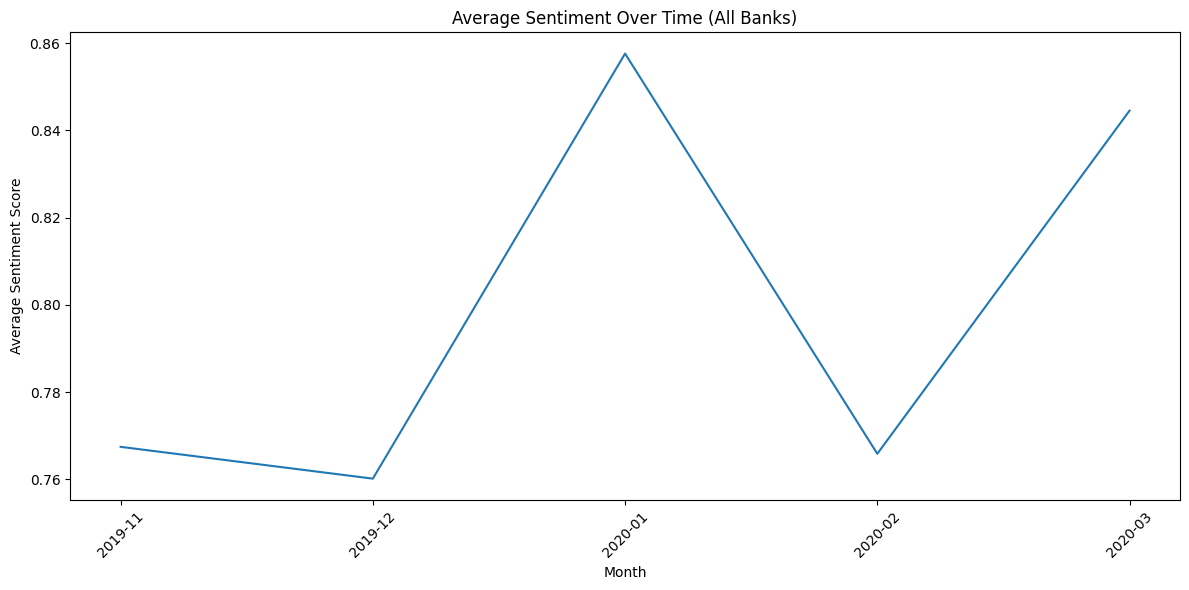

In [ ]:
# Assuming you have a 'date' column and 'sentiment_simplified' column
dfst['date'] = pd.to_datetime(dfst['date'])
dfst['sentiment_score'] = dfst['sentiment_simplified']
sentiment_over_time = dfst.groupby(dfst['date'].dt.to_period('M'))['sentiment_score'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sentiment_over_time.index.astype(str), y=sentiment_over_time.values)
plt.title('Average Sentiment Over Time (All Banks)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


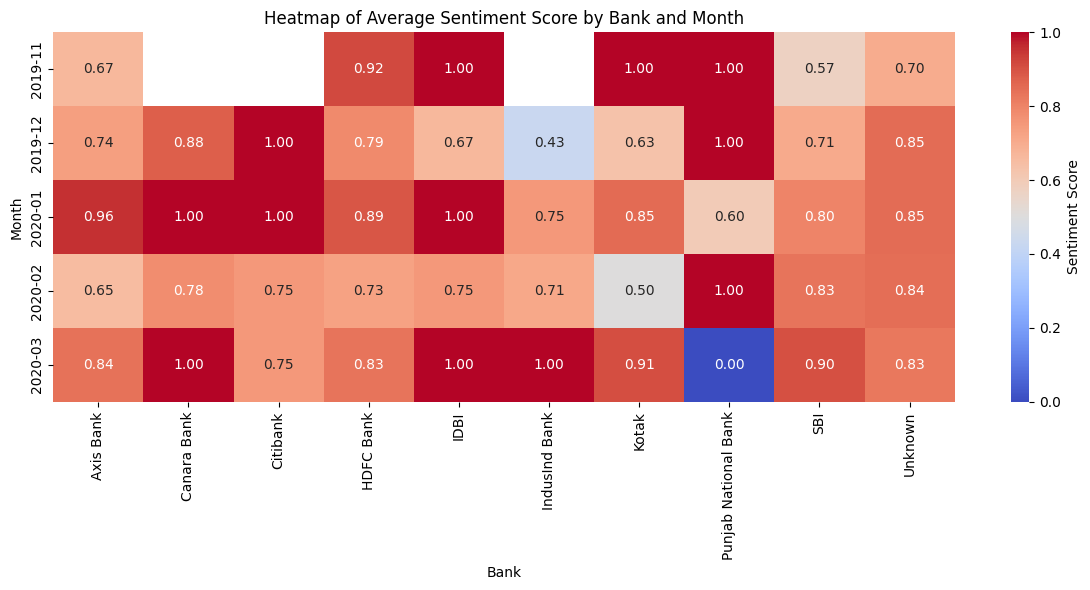

In [ ]:
sentiment_by_bank_month = dfst.groupby([dfst['date'].dt.to_period('M'), 'bank'])['sentiment_score'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_by_bank_month, cmap="coolwarm", annot=True, fmt='.2f', cbar_kws={'label': 'Sentiment Score'})
plt.title('Heatmap of Average Sentiment Score by Bank and Month')
plt.xlabel('Bank')
plt.ylabel('Month')
plt.tight_layout()
plt.show()


<ipython-input-22-8d63702c9087>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_count_by_bank.index, y=review_count_by_bank.values, palette="Blues_d")


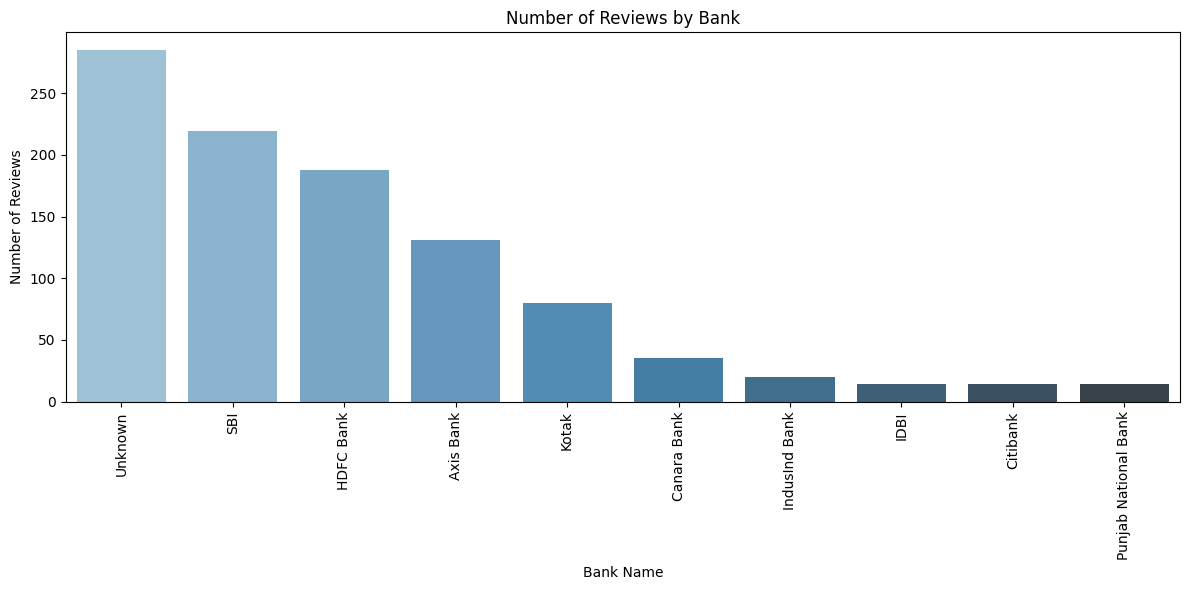

In [ ]:
review_count_by_bank = dfst['bank'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=review_count_by_bank.index, y=review_count_by_bank.values, palette="Blues_d")
plt.title('Number of Reviews by Bank')
plt.xlabel('Bank Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Visuals for specific bank

<ipython-input-23-2c79869a41d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['sentiment'] = df_bank['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
<ipython-input-23-2c79869a41d2>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


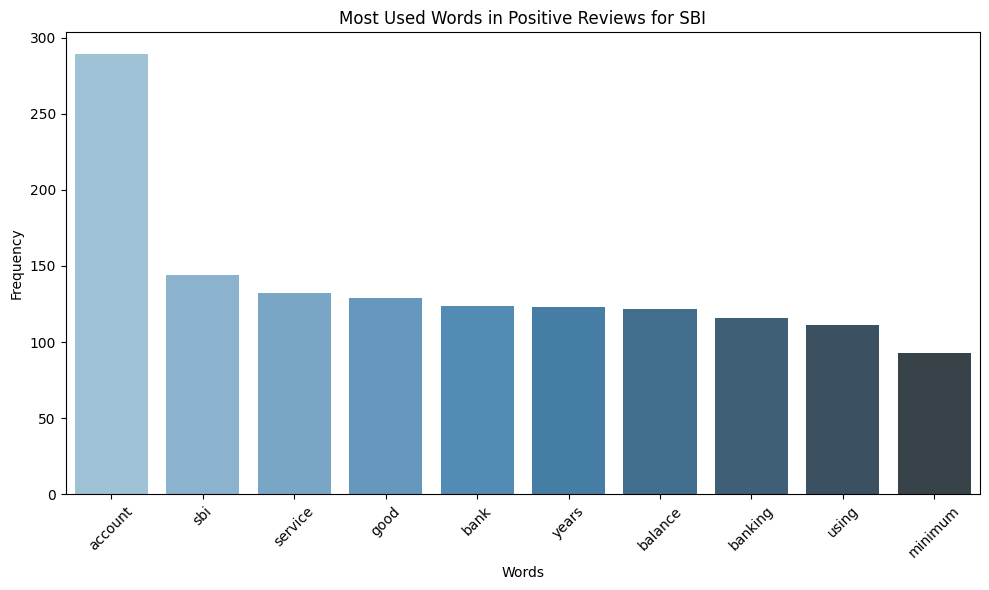

<ipython-input-23-2c79869a41d2>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


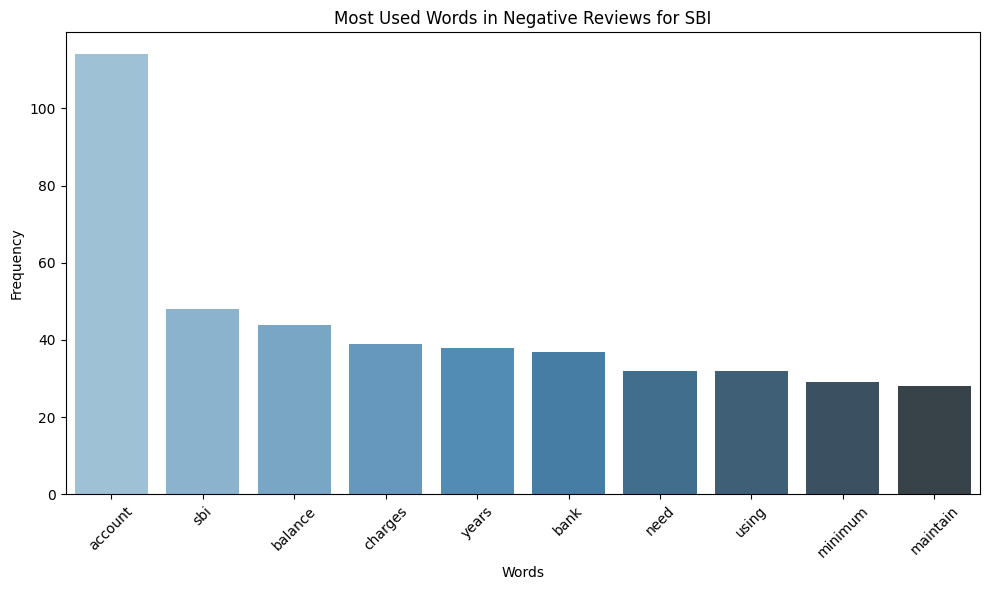

<ipython-input-23-2c79869a41d2>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


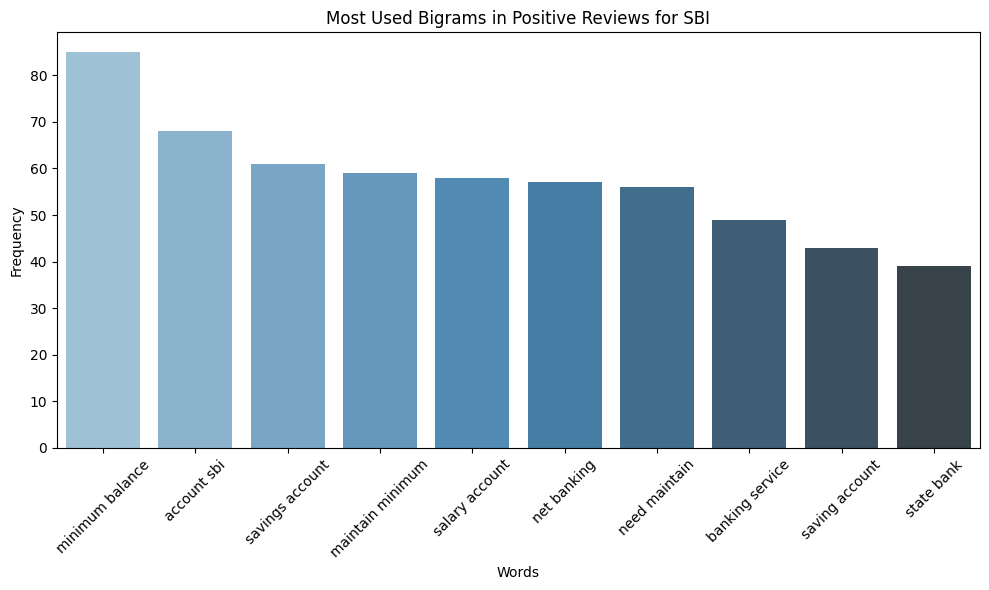

<ipython-input-23-2c79869a41d2>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


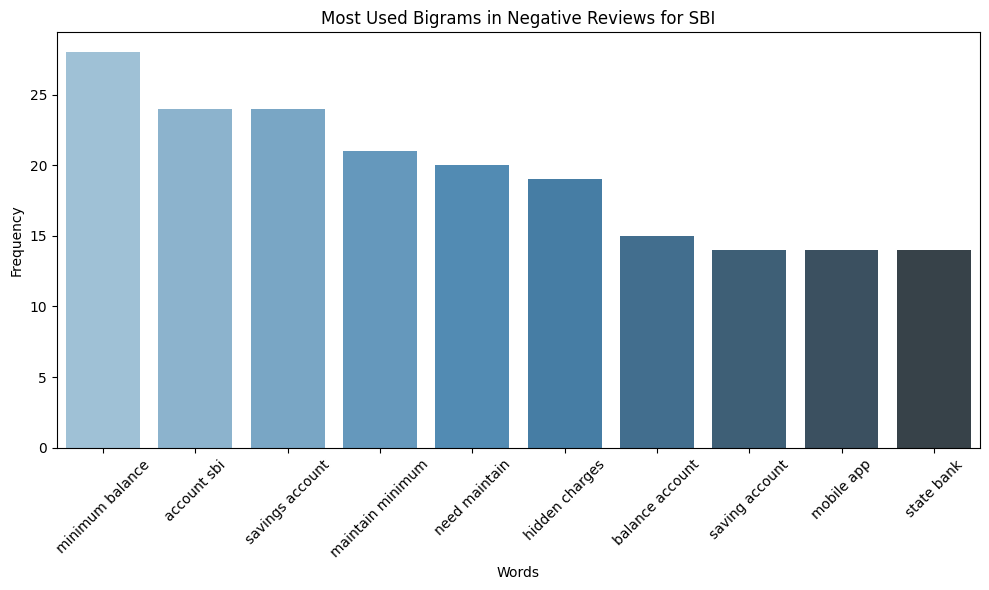

In [ ]:
# Example: Filter reviews for a specific bank
bank_name = 'SBI'  # Change this to the specific bank
df_bank = dfsr[dfsr['bank'] == bank_name]

# Apply sentiment analysis to the review field (already done)
df_bank['sentiment'] = df_bank['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Separate reviews into positive and negative
positive_reviews = df_bank[df_bank['sentiment'] > 0]
negative_reviews = df_bank[df_bank['sentiment'] < 0]

# Function to preprocess and remove stopwords
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return filtered_tokens

# Get most used words for positive and negative reviews
positive_words = positive_reviews['review'].apply(preprocess_text).explode()
negative_words = negative_reviews['review'].apply(preprocess_text).explode()

# Count most common words for positive and negative reviews
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Plotting most used words for positive and negative reviews
def plot_most_common_words(word_counts, title):
    most_common_words = word_counts.most_common(10)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts), palette="Blues_d")
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_most_common_words(positive_word_counts, 'Most Used Words in Positive Reviews for ' + bank_name)
plot_most_common_words(negative_word_counts, 'Most Used Words in Negative Reviews for ' + bank_name)

# Ensure the get_ngrams function returns a list instead of a generator
def get_ngrams(words, n=2):
    return list(ngrams(words, n))  # Convert the generator to a list

# Assuming positive_reviews and negative_reviews are defined and preprocessed

# Apply the function to get bigrams (2-grams) for positive and negative reviews
positive_bigrams = positive_reviews['review'].apply(preprocess_text).apply(lambda x: get_ngrams(x, n=2)).explode()
negative_bigrams = negative_reviews['review'].apply(preprocess_text).apply(lambda x: get_ngrams(x, n=2)).explode()

# Flatten the list of bigrams and count occurrences
positive_bigram_counts = Counter([' '.join(bigram) for bigram in positive_bigrams if bigram])
negative_bigram_counts = Counter([' '.join(bigram) for bigram in negative_bigrams if bigram])

# Plot the most common bigrams for positive reviews
plot_most_common_words(positive_bigram_counts, 'Most Used Bigrams in Positive Reviews for ' + bank_name)

# Plot the most common bigrams for negative reviews
plot_most_common_words(negative_bigram_counts, 'Most Used Bigrams in Negative Reviews for ' + bank_name)

<ipython-input-27-62e86c262cb7>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


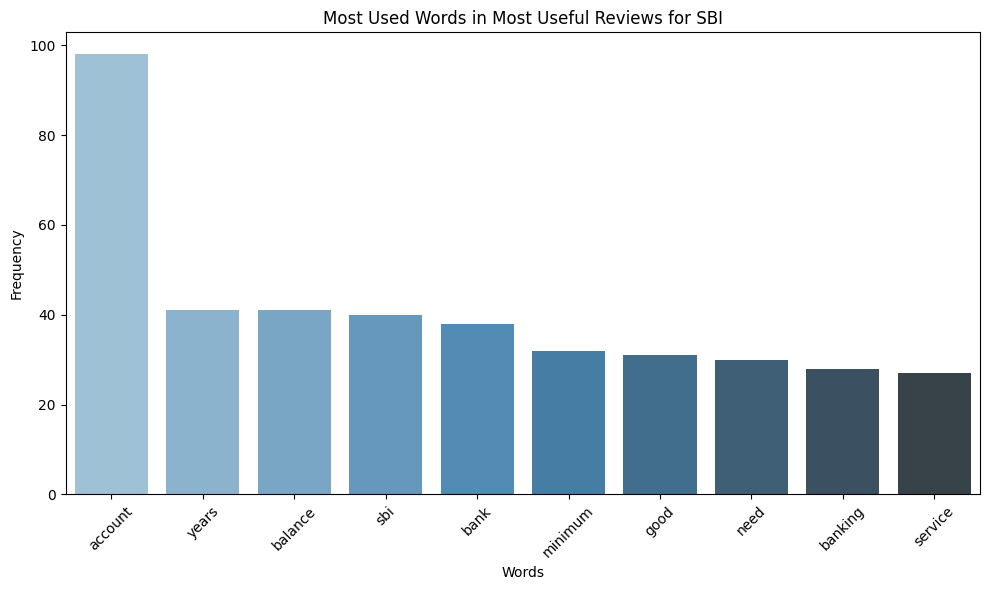

<ipython-input-27-62e86c262cb7>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_7_reviews['review_title_by_user'], y=top_7_reviews['useful_count'], palette="Blues_d")


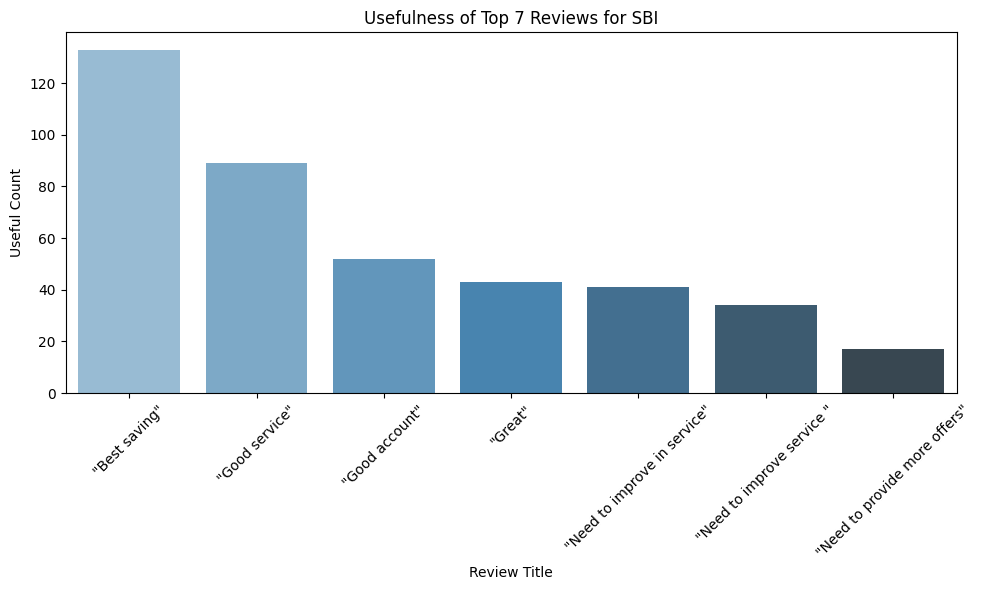

In [ ]:
#test 2

import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

# Assuming dfsr is your DataFrame with 'bank', 'review', 'review_title_by_user', 'useful_count' columns
bank_name = 'SBI'  # Specify the bank you are analyzing
df_bank = dfsr[dfsr['bank'] == bank_name]  # Filter for the specific bank

# Filter the reviews based on the most useful count (assuming 'review_title_by_user' is the useful count)
df_bank_sorted = df_bank.sort_values(by='useful_count', ascending=False)  # Sort by 'useful_count'

# Extract the most useful reviews (top 50 useful reviews, but limit the second plot to 7)
top_useful_reviews = df_bank_sorted.head(50)

# Preprocess text (not needed for `useful_count` plotting, but left in case)
# Preprocessing function (if we need to process review words)
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize text to lower case
    stop_words = set(stopwords.words('english'))  # Set of stopwords
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Filter stopwords
    return filtered_tokens

# Count most common words for the most useful reviews (we can still use this for word visualization)
useful_reviews_words = top_useful_reviews['review'].apply(preprocess_text).explode()

# Count the frequency of words in the most useful reviews
useful_word_counts = Counter(useful_reviews_words)

# Function to plot most common words
def plot_most_common_words(word_counts, title):
    most_common_words = word_counts.most_common(10)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts), palette="Blues_d")
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot most common words for the most useful reviews
plot_most_common_words(useful_word_counts, f'Most Used Words in Most Useful Reviews for {bank_name}')

# Plotting the useful_count for the top 7 useful reviews
def plot_useful_count(df, title):
    # Take the top 7 reviews based on 'useful_count'
    top_7_reviews = df.head(7)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_7_reviews['review_title_by_user'], y=top_7_reviews['useful_count'], palette="Blues_d")
    plt.title(title)
    plt.xlabel('Review Title')
    plt.ylabel('Useful Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot useful_count for the top 7 useful reviews
plot_useful_count(top_useful_reviews, f'Usefulness of Top 7 Reviews for {bank_name}')


<ipython-input-32-b1ae53aedb58>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['sentiment'] = df_bank['review'].apply(analyze_sentiment)
<ipython-input-32-b1ae53aedb58>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


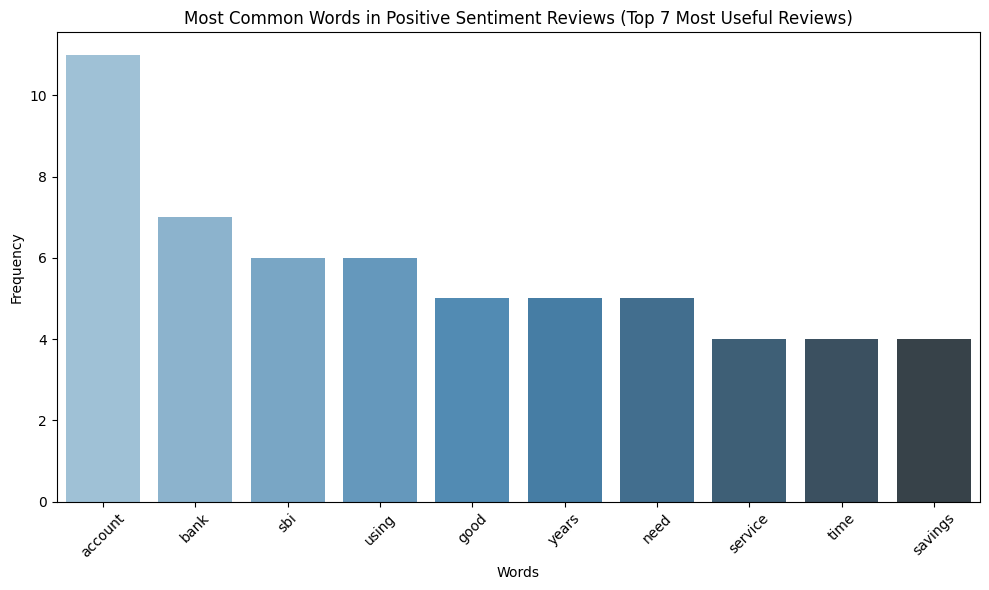

<ipython-input-32-b1ae53aedb58>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Blues_d")


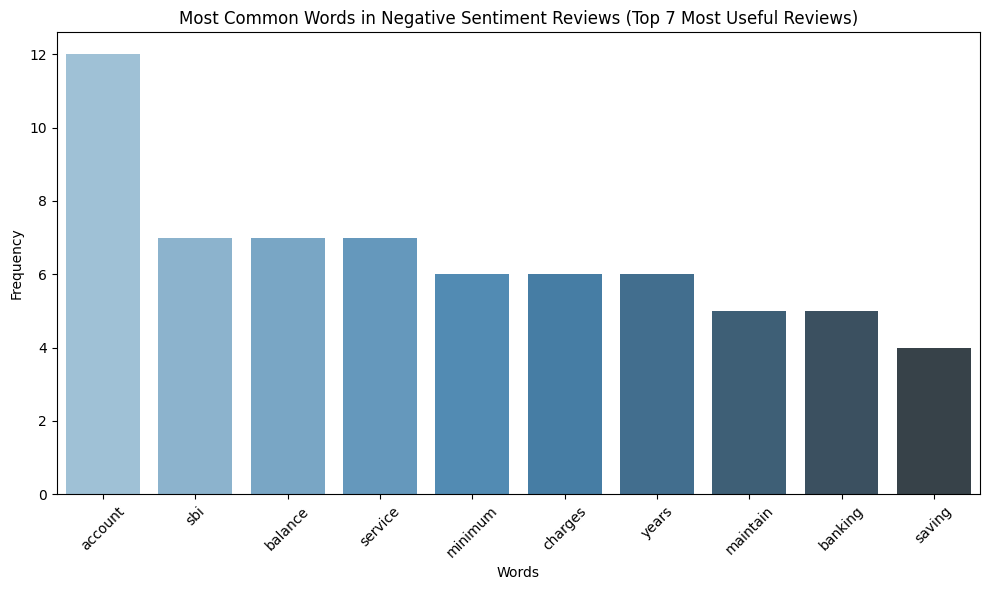

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Assuming dfsr is your DataFrame with 'bank', 'review', 'review_title_by_user', 'useful_count' columns
bank_name = 'SBI'  # Specify the bank you are analyzing
df_bank = dfsr[dfsr['bank'] == bank_name]  # Filter for the specific bank

# Sentiment analysis initialization
sia = SentimentIntensityAnalyzer()

# Preprocessing function (same as before)
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize text to lower case
    stop_words = set(stopwords.words('english'))  # Set of stopwords
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Filter stopwords
    return filtered_tokens

# Function to analyze sentiment of each review (positive or negative)
def analyze_sentiment(review):
    sentiment_score = sia.polarity_scores(review)['compound']
    return 'positive' if sentiment_score > 0 else 'negative'

# Apply sentiment analysis on reviews and add a new column for sentiment classification
df_bank['sentiment'] = df_bank['review'].apply(analyze_sentiment)

# Separate positive and negative sentiment reviews
positive_reviews = df_bank[df_bank['sentiment'] == 'positive']
negative_reviews = df_bank[df_bank['sentiment'] == 'negative']

# Sort by 'useful_count' and select the top 7 useful positive reviews
positive_reviews_sorted = positive_reviews.sort_values(by='useful_count', ascending=False)
top_7_positive_reviews = positive_reviews_sorted.head(7)

# Sort by 'useful_count' and select the top 7 useful negative reviews
negative_reviews_sorted = negative_reviews.sort_values(by='useful_count', ascending=False)
top_7_negative_reviews = negative_reviews_sorted.head(7)

# Function to plot most common words for the top N useful reviews
def plot_most_common_words_from_reviews(df_reviews, sentiment):
    # Tokenize the reviews and preprocess them
    all_words = df_reviews['review'].apply(preprocess_text).explode()

    # Count the frequency of each word
    word_counts = Counter(all_words)

    # Get the most common words
    most_common_words = word_counts.most_common(10)  # You can change this number to show more/less words
    words, counts = zip(*most_common_words)

    # Plot the most common words with useful_count as a factor
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(words), y=list(counts), palette="Blues_d")
    plt.title(f'Most Common Words in {sentiment} Sentiment Reviews (Top 7 Most Useful Reviews)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot most common words in top 7 most useful positive sentiment reviews
plot_most_common_words_from_reviews(top_7_positive_reviews, 'Positive')

# Plot most common words in top 7 most useful negative sentiment reviews
plot_most_common_words_from_reviews(top_7_negative_reviews, 'Negative')
